In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
ind_states = gpd.read_file('IND_adm/IND_adm1.shp')

In [3]:
df = pd.read_csv('indian_population.csv')

In [4]:
df.head()

,State / Union Territory,Population
0,Andaman and Nicobar Islands,380581
1,Andhra Pradesh,49577103
2,Arunachal Pradesh,1383727
3,Assam,31205576
4,Bihar,104099452


In [5]:
ind_states.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,State,State,None,Agence de la FrontiÃ¨re du Nord-Est(French-obs...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [6]:
ind_states = ind_states[['NAME_1', 'geometry']]

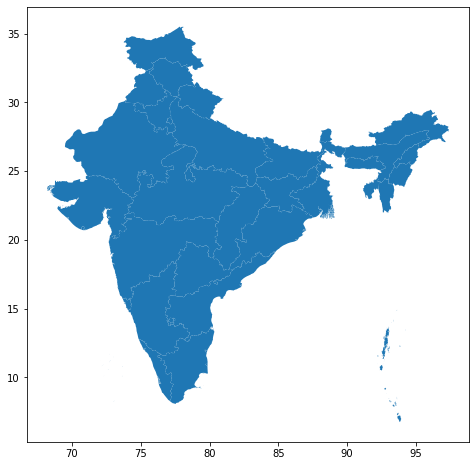

In [7]:
ind_states.plot(figsize=(12,8))

In [8]:
ind_states.rename(columns = {'NAME_1' : 'States'}, inplace = True)

In [9]:
ind_states.head()

,States,geometry
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [10]:
df.rename(columns = {'State / Union Territory': 'States'}, inplace=True)

In [11]:
df.head()

,States,Population
0,Andaman and Nicobar Islands,380581
1,Andhra Pradesh,49577103
2,Arunachal Pradesh,1383727
3,Assam,31205576
4,Bihar,104099452


In [12]:
for index, row in ind_states['States'].iteritems():
    if row in df['States'].tolist():
        pass
    else:
        print('The state ', row , ' is NOT in the population_data list')

The state  Andaman and Nicobar  is NOT in the population_data list
The state  Orissa  is NOT in the population_data list
The state  Telangana  is NOT in the population_data list
The state  Uttaranchal  is NOT in the population_data list


In [13]:
df.replace('Andaman and Nicobar Islands', 'Andaman and Nicobar', inplace = True)
df.replace('Odisha', 'Orissa', inplace = True)
df.replace('Telengana', 'Telangana', inplace = True)
df.replace('Uttarakhand', 'Uttaranchal', inplace = True)

In [14]:
for index, row in ind_states['States'].iteritems():
    if row in df['States'].tolist():
        pass
    else:
        print('The state ', row , ' is NOT in the population_data list')

In [15]:
print(len(df['States']))
print(len(ind_states['States']))

36
36


In [16]:
ind_states = ind_states.merge(df, on = 'States')

In [17]:
ind_states.head()

,States,geometry,Population
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",380581
1,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",49577103
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",1383727
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",31205576
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",104099452


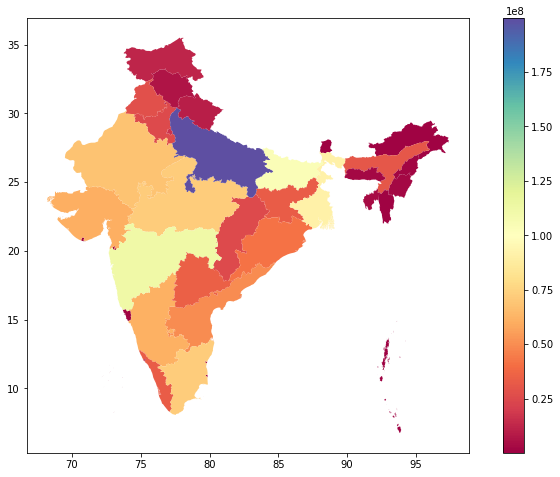

In [18]:
ind_states.plot(column = 'Population', cmap = 'Spectral', legend = True, figsize=(12,8))
plt.savefig('population_INDIA.png')